<a href="https://colab.research.google.com/github/ibrahimr/NLP-intro/blob/main/Intro_IR_CLEANING_DATA_AND__TEXT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is LAB Prepared by Dr.**Ragia Ibrahim**
---



## Different Applications of NLP Classification

* Sentiment Analysis (Emotion Classification)
* Spam Detection (Email & Message Classification)
* Topic Classification (News and Document Categorization)

##  Main steps of developing NLP for classification

* Data Collection
* Data Preprocessing
* Feature Extraction
* Model Selection and Training
* Evaluation


## The main types of data preprocessing
### 1. Text Cleaning: Preprocessing the raw text to remove noise and irrelevant content.
* Lowercasing: Convert all text to lowercase to ensure uniformity. Example:
"Hello World" → "hello world"
* Removing Punctuation: Eliminating symbols like .,!?@#. Example: "hello,
world!" → "hello world"
* Removing Special Characters: Remove non-alphanumeric characters.
Example: "I love #AI & NLP" → "I love AI NLP"
* Removing Numbers (optional): If numbers are not meaningful for the task.
Example: "Today is 13th" → "Today is"
* Removing URLs, Emails, Mentions: For social media, forums, emails.
Example: "Check http://example.com" → "Check"
* Removing HTML tags:
## 2. Tokenization: Splitting text into units: words, subwords, or sentences.
  - word Tokenization: "I love NLP." → ["I", "love", "NLP", "."]
  - Sentence Tokenization: "I love NLP. It is powerful." → ["I love NLP.", "It is
powerful."]
## 3.Normalization: Reducing text to a canonical form.
-  Stemming: Reduce words to root form (may not be meaningful). Example:
-  "playing", "played", "plays" → "play" Tool: PorterStemmer, SnowballStemmer
Lemmatization: Reduce words to dictionary form using context. Example: "am",
"are", "is" → "be" Tool: WordNetLemmatizer
## 4.Stop Words Removal:
-  Eliminate common but insignificant words (e.g., "the", "is","in").
 Example: "This is a book" → "book"

In [ ]:
import  re  #Imports Python’s built-in regular expressions module used for pattern matching in text.
import nltk # used for natural language processing tasks like tokenization, stemming, etc.
import spacy # library for advanced text processing.
from nltk.corpus import stopwords # Loads the list of common stopwords
from nltk.tokenize import word_tokenize # Imports a function to split text into individual words (tokens).
from nltk.stem import PorterStemmer #Imports the PorterStemmer, which is used to reduce words to their root form
from nltk.stem import WordNetLemmatizer # reduces words to their base dictionary form (e.g., "better" → "good").

In [ ]:
######### Download NLTK resources (only first timeResource punkt_tab not found.)
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### cleaning text function called "preprocess_text" -> returns clean English text


In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
  text = text.lower() #
  print(text)
  text = re.sub(r'http\S+|www.\S+', '', text) #Lowercase the text
  print(text)
  text = re.sub(r'<.*?>', '', text) #Remove HTML Tags
  print(text)
  text = re.sub(r'[^a-zA-Z\s]', '', text) #Remove Special Characters, Numbers, and Punctuation
  print(text)
  tokens = word_tokenize(text) #Tokenization
  tokens = [word for word in tokens if word not in stop_words] #Remove Stop Words
  stemmed_tokens = [stemmer.stem(word) for word in tokens]  # Stemming
  clean_text = ' '.join(stemmed_tokens) #reconstruct Text
  return clean_text



In [ ]:
sample_text = """
Hello! This is a test document. Visit https://example.com for more
info.
I bought 5 products from Amazon. Let's meet at 5:00 PM. I can't wait
to see you! 😊
"""
final_text = preprocess_text(sample_text)

final_text

'hello test document visit info bought product amazon let meet pm cant wait see'

# Feature representation

Feature representation means how textual data is converted into a format that machine learning models can process.
**Main concepts should be knowen**

1.   Bag of Words (BoW)
2.   TF-IDF (Term Frequency–Inverse Document Frequency)
3. N-grams (Unigrams, Bigrams, Trigrams)





In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

### Reading dataset
 -  to Upload From Your Local Machine, the following code   will prompt you to choose a file from your local machine. After uploading, you can read it like this (for example, if it's a CSV):
 - used dataset test.csv (will be provided)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
df = pd.read_csv("test.csv",encoding="ISO-8859-1")
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,1430
positive,1103
negative,1001


In [ ]:
stemmer = PorterStemmer()
# Stop words list
stop_words = set(stopwords.words('english'))
df['clean'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else "") #lower
def preprocess_text(text):
  text = re.sub(r'http\S+|www.\S+', '', text) #Lowercase the text
  text = re.sub(r'<.*?>', '', text) #Remove HTML Tags
  text = re.sub(r'\W+', ' ', text)
  text = re.sub(r'[^a-zA-Z\s]', '', text) #Remove Special Characters, Numbers, and Punctuation
  #text = text.lower()
  tokens = word_tokenize(text) #Tokenization
  tokens = [word for word in tokens if word not in stop_words] #Remove Stop Words
  stemmed_tokens = [stemmer.stem(word) for word in tokens]  # Stemming
  clean_text = ' '.join(stemmed_tokens) #reconstruct Text
  return clean_text

## Cleaning dataset

In [ ]:
df = df.dropna()  #remove na data
df["clean_text"] = df["text"].apply(preprocess_text) #pply a function along an axis (rows or columns) of a DataFrame
df['clean_text']

,clean_text
0,last session day
1,shanghai also realli excit precis skyscrap gal...
2,recess hit veroniqu branquinho quit compani shame
3,happi bday
4,i like
...,...
3529,im tire sleep tri
3530,all alon old hous thank net keep aliv kick who...
3531,i know mean my littl dog sink depress want mov...
3532,sutra next youtub video gon na i love video


## Define features and target variable

In [ ]:
X = df['clean_text'].values
y = df['sentiment'].values

## to use classifiers first
- represent tokens (text) firstly ...as zeros and ones (boolean)  in this modle
- splitting data to training data that we will create the model with and test data to evaluate the created model
-create funciton that will be used to evaluate models after applying the classifier

In [ ]:
X

array(['last session day',
       'shanghai also realli excit precis skyscrap galor good tweep china sh bj',
       'recess hit veroniqu branquinho quit compani shame', ...,
       'i know mean my littl dog sink depress want move someplac tropic',
       'sutra next youtub video gon na i love video',
       'omgssh ang cute ng bbi'], dtype=object)

In [ ]:
y

array(['neutral', 'positive', 'negative', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y,
test_size=0.30, random_state=42, stratify=y)

### Model evaluation

In [ ]:
def evaluate_model(model_name, y_true, y_pred):
  # Calculate metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  cm = confusion_matrix(y_true, y_pred)
  # Create a report
  report = classification_report(y_true, y_pred)
  # Output results
  metrics = {'Model Name': model_name,'Accuracy': accuracy,'Precision': precision,'Recall': recall,
             'F1 Score': f1,'Classification Report': report
             }
  # Plot Confusion Matrix
  plt.figure(figsize=(4, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=np.unique(y_true),
              yticklabels=np.unique(y_true))
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()
  return metrics


### Random Forest Classifier


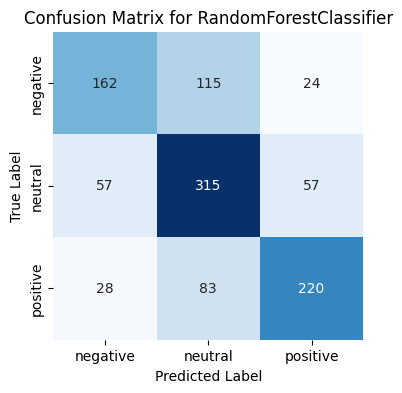

Model Name: 
RandomForestClassifier
Accuracy: 0.6569
Precision: 0.6624
Recall: 0.6569
F1 Score: 0.6553
              precision    recall  f1-score   support

    negative       0.66      0.54      0.59       301
     neutral       0.61      0.73      0.67       429
    positive       0.73      0.66      0.70       331

    accuracy                           0.66      1061
   macro avg       0.67      0.65      0.65      1061
weighted avg       0.66      0.66      0.66      1061


Best hyperparameters found by GridSearchCV:
{'max_depth': None, 'n_estimators': 300}


In [ ]:
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Define the hyperparameters for grid search
param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 10, 20, 30],
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier,
param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best estimator from grid search
best_rf_classifier = grid_search.best_estimator_
# Make predictions using the best model
y_pred = best_rf_classifier.predict(X_test)
# Evaluate the model
evaluation_results = evaluate_model('RandomForestClassifier', y_test,y_pred)
# Print the evaluation results
for key, value in evaluation_results.items():
  if key == 'Classification Report':
    print(value) # Print report separately for better readability
  else:
    print(f"{key}: {value:.4f}" if isinstance(value, float) else
  f"{key}: \n{value}")
# Print the best parameters found by grid search
print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

## LogisticRegression

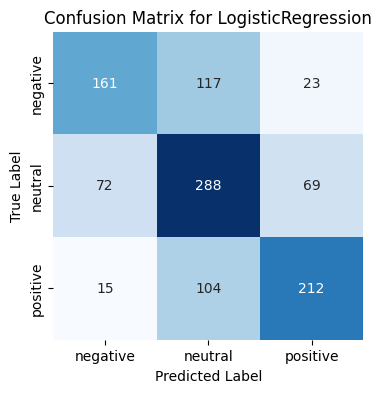

Model Name: 
LogisticRegression
Accuracy: 0.6230
Precision: 0.6305
Recall: 0.6230
F1 Score: 0.6230
              precision    recall  f1-score   support

    negative       0.65      0.53      0.59       301
     neutral       0.57      0.67      0.61       429
    positive       0.70      0.64      0.67       331

    accuracy                           0.62      1061
   macro avg       0.64      0.62      0.62      1061
weighted avg       0.63      0.62      0.62      1061


Best hyperparameters found by GridSearchCV:
{'solver': 'lbfgs'}


In [ ]:
# Define the Logistic Regression model
LR = LogisticRegression(random_state=42)
# Define the hyperparameters for grid search
param_grid = {
'solver': ['liblinear', 'lbfgs'],
# Solver type
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5,
scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best estimator from grid search
best_LR = grid_search.best_estimator_
# Make predictions using the best model
y_pred = best_LR.predict(X_test)
# Evaluate the model
evaluation_results = evaluate_model('LogisticRegression', y_test,y_pred)
# Print the evaluation results
for key, value in evaluation_results.items():
  if key == 'Classification Report':
    print(value) # Print report separately for better readability
  else:
    print(f"{key}: {value:.4f}" if isinstance(value, float) else
  f"{key}: \n{value}")
# Print the best hyperparameters found by grid search
print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

### Support Vector Machine

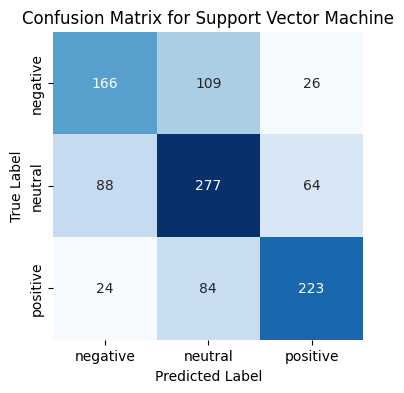

Model Name: 
Support Vector Machine
Accuracy: 0.6277
Precision: 0.6300
Recall: 0.6277
F1 Score: 0.6279
              precision    recall  f1-score   support

    negative       0.60      0.55      0.57       301
     neutral       0.59      0.65      0.62       429
    positive       0.71      0.67      0.69       331

    accuracy                           0.63      1061
   macro avg       0.63      0.62      0.63      1061
weighted avg       0.63      0.63      0.63      1061


Best hyperparameters found by GridSearchCV:
{'kernel': 'linear'}


In [ ]:
SVM = SVC(random_state=42)
# Define the hyperparameters for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
# Kernel type
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=5,
scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best estimator from grid search
best_SVM = grid_search.best_estimator_
# Make predictions using the best model
y_pred = best_SVM.predict(X_test)
# Evaluate the model
evaluation_results = evaluate_model('Support Vector Machine', y_test,
y_pred)
# Print the evaluation results
for key, value in evaluation_results.items():
  if key == 'Classification Report':
    print(value) # Print report separately for better readability
  else:
    print(f"{key}: {value:.4f}" if isinstance(value, float) else
  f"{key}: \n{value}")
# Print the best hyperparameters found by grid search
print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)